#### Ask about the clusters being standarized or dropped or neither... coz gender (without being standardized or dropping) has better result... so should do the same for the others. There are only change in moon and nested clusters 

In [102]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
import plotly.express as px
from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")

In [69]:
# datasets = {
#    "SC_df": pd.read_csv('./Datasets/Speherical_Clusters.csv'),
#     "MC_df": pd.read_csv('./Datasets/moons_Clusters.csv'),
#     "NC_df": pd.read_csv('./Datasets/Nested_Clusters.csv'),
#     "HS_df": pd.read_csv('./Datasets/Mall_Customers.csv')
# }

SC_df = pd.read_csv('./Datasets/Speherical_Clusters.csv')
MC_df = pd.read_csv('./Datasets/moons_Clusters.csv')
NC_df = pd.read_csv('./Datasets/Nested_Clusters.csv')
HS_df = pd.read_csv('./Datasets/Mall_Customers.csv')


In [70]:
SC_df.head()
## Considering cluster column as categorical variable 

,Feature1,Feature2,Cluster
0,-2.004128,7.852632,3
1,0.670479,4.040943,0
2,-2.263678,8.273068,3
3,-2.350730,2.277237,2
4,2.228740,1.145386,1


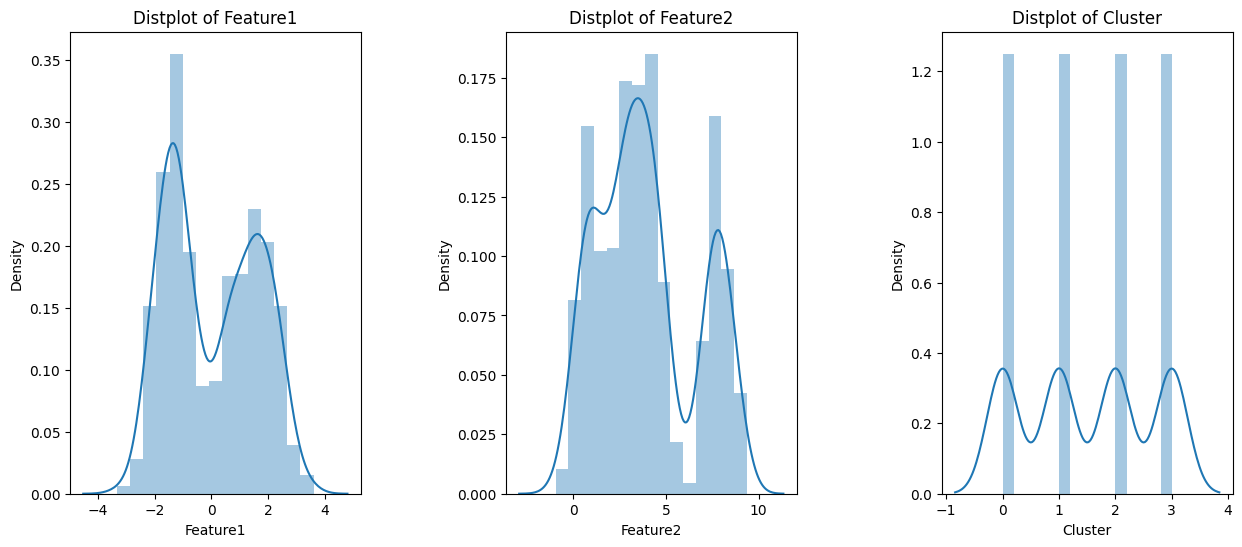

In [71]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Feature1' , 'Feature2' , 'Cluster']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(SC_df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [72]:
print("Unique values in Cluster column: ", len(SC_df['Cluster'].unique()), SC_df['Cluster'].unique())
## Considering cluster column as categorical variable

Unique values in Cluster column:  4 [3 0 2 1]


In [73]:
MC_df.head()

,Feature1,Feature2,Cluster
0,2.064430,0.546069,1
1,1.762473,-0.062689,1
2,-0.245490,0.668868,0
3,-0.174630,0.183882,1
4,0.452110,-0.406512,1


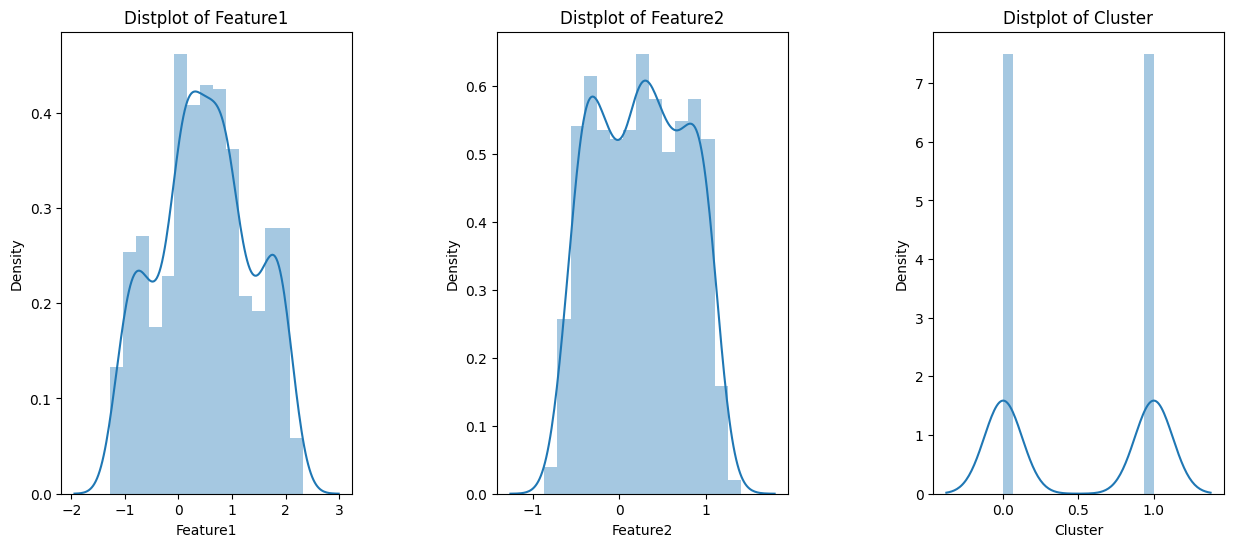

In [74]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Feature1' , 'Feature2' , 'Cluster']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(MC_df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [75]:
print("Unique values in Cluster column: ", len(MC_df['Cluster'].unique()), MC_df['Cluster'].unique())
## Considering cluster column as categorical variable 

Unique values in Cluster column:  2 [1 0]


In [76]:
NC_df.head()

,Feature1,Feature2,Cluster
0,-0.163255,-0.086455,0
1,-0.011146,0.011499,0
2,-2.115056,1.405365,2
3,0.542611,0.715939,1
4,2.320800,0.117091,2


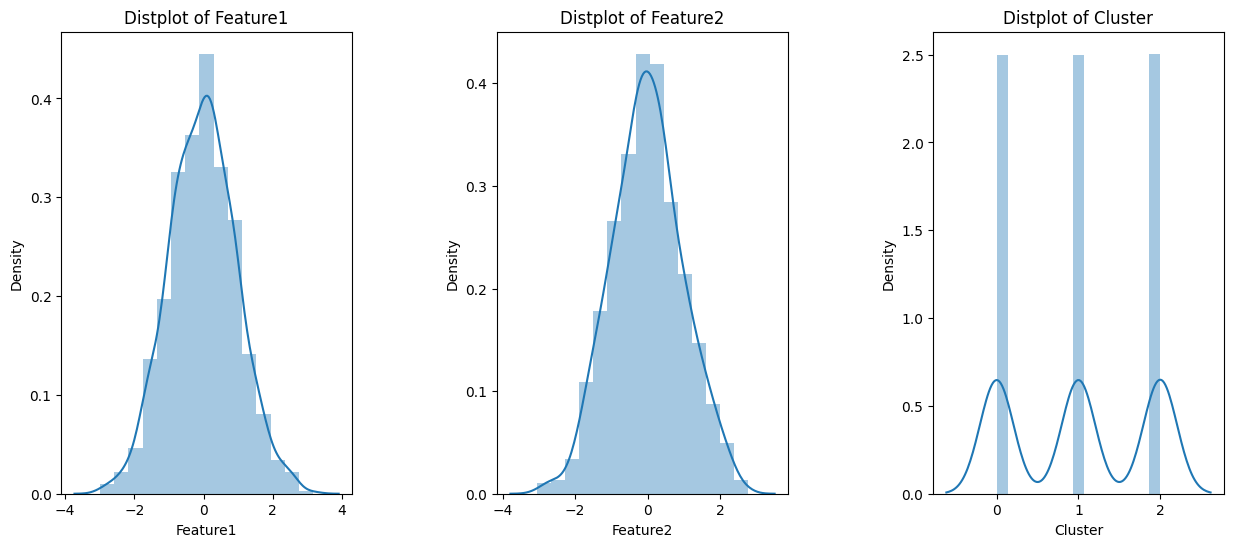

In [77]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Feature1' , 'Feature2' , 'Cluster']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(NC_df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [78]:
print("Unique values in Cluster column: ", len(NC_df['Cluster'].unique()), NC_df['Cluster'].unique())
## Considering cluster column as categorical variable 

Unique values in Cluster column:  3 [0 2 1]


In [79]:
HS_df.head()
## Considering cluster column as categorical variable and dropping CustomerID column

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [80]:
## converting it to make it easier for standarizing the data
HS_df['Age'] = HS_df['Age'].astype(float) 
HS_df['Annual Income (k$)'] = HS_df['Annual Income (k$)'].astype(float)
HS_df['Spending Score (1-100)'] = HS_df['Spending Score (1-100)'].astype(float)
HS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


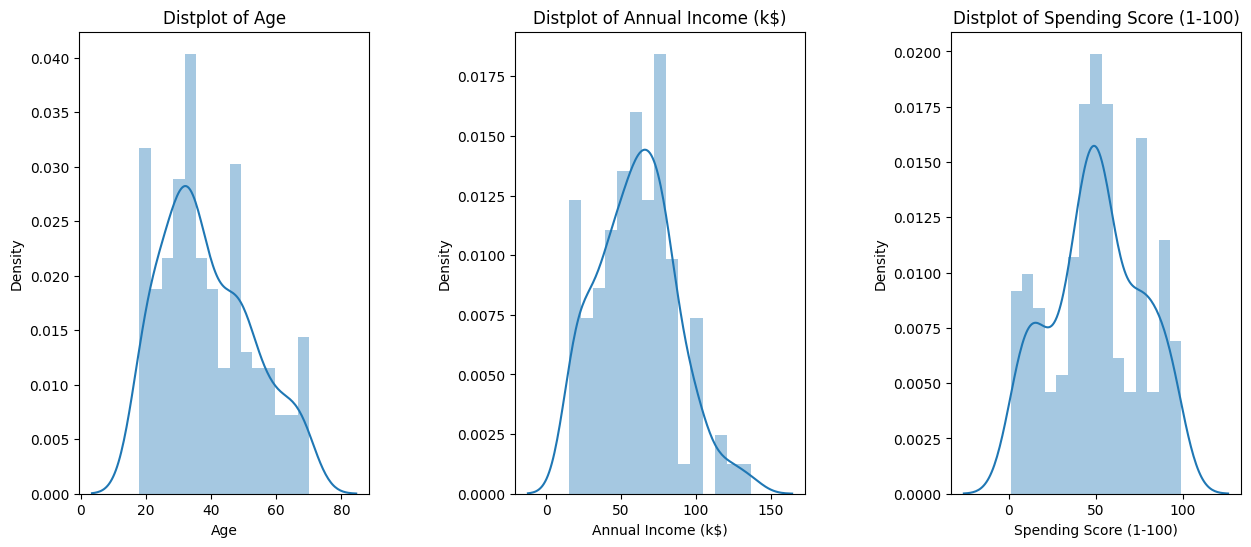

In [81]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(HS_df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()
## Gender is a categorical variable and will convert it as such 

In [82]:
# ## label encoding for 'Gender' column in HS_df 
# label_encoder = preprocessing.LabelEncoder() 

# HS_df['Gender'] = label_encoder.fit_transform(HS_df['Gender'])
# HS_df.drop(columns=['CustomerID'], inplace=True)
# HS_df.head()

## Encoding Gender after standardizing the data because Gender is categorical variable

In [83]:
def scale_data(df):
    # Step 1: Separate numeric columns (float64, int64) from categorical (assuming label-encoded as int64)
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = df.select_dtypes(include=['object' ]).columns

    # Step 2: Scale only the numeric columns
    scaler = StandardScaler()
    df_scaled_numeric = scaler.fit_transform(df[numeric_columns])

    # Step 3: Convert scaled numeric data back to a DataFrame
    df_scaled_numeric = pd.DataFrame(df_scaled_numeric, columns=numeric_columns, index=df.index)

    # Step 4: Combine scaled numeric data and original categorical data
    df_combined = pd.concat([df_scaled_numeric, df[categorical_columns]], axis=1)
    
    return df_combined

In [84]:
SC_df = scale_data(SC_df)
print(SC_df.head())
MC_df = scale_data(MC_df)
print(MC_df.head())
NC_df = scale_data(NC_df)
print(NC_df.head())
HS_df_modified = scale_data(HS_df)
print(HS_df_modified.head())

   Feature1  Feature2   Cluster
0 -1.291821  1.483035  1.341641
1  0.393237  0.023513 -1.341641
2 -1.455343  1.644022  1.341641
3 -1.510187 -0.651822  0.447214
4  1.374974 -1.085215 -0.447214
   Feature1  Feature2  Cluster
0  1.774561  0.573310      1.0
1  1.431645 -0.598025      1.0
2 -0.848695  0.809592     -1.0
3 -0.768224 -0.123589      1.0
4 -0.056467 -1.259588      1.0
   Feature1  Feature2   Cluster
0 -0.145239 -0.077976 -1.225664
1  0.010869  0.021800 -1.225664
2 -2.148349  1.441599  1.223215
3  0.579183  0.739346 -0.001224
4  2.404117  0.129357  1.223215
   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  Gender
0   -1.723412 -1.424569           -1.738999               -0.434801    Male
1   -1.706091 -1.281035           -1.738999                1.195704    Male
2   -1.688771 -1.352802           -1.700830               -1.715913  Female
3   -1.671450 -1.137502           -1.700830                1.040418  Female
4   -1.654129 -0.563369           -1.662660       

In [85]:
## label encoding for 'Gender' column in HS_df
label_encoder = preprocessing.LabelEncoder() 
HS_df_modified['Gender'] = label_encoder.fit_transform(HS_df_modified['Gender'])
# HS_df_modified['Gender'] = HS_df_modified['Gender'].replace({0: -1}) Giving worse clusters 
# HS_df_modified.drop(columns=['Gender'], inplace=True) giving same results only --> Should it be dropped???
HS_df_modified.drop(columns=['CustomerID'], inplace=True)
HS_df_modified.head()

# Trying to drop the clusters to see if the clusters are better or worse
SC_df = SC_df.drop(columns=['Cluster'])
MC_df = MC_df.drop(columns=['Cluster'])
NC_df = NC_df.drop(columns=['Cluster'])

In [86]:
def print_dendogram(data, method):
    Z = linkage(data, method)
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.show()

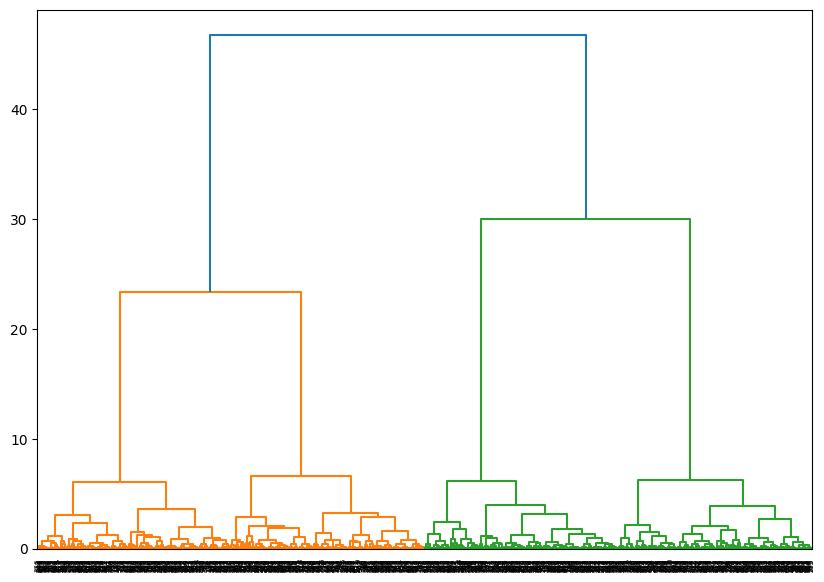

In [87]:
print_dendogram(SC_df, 'ward')

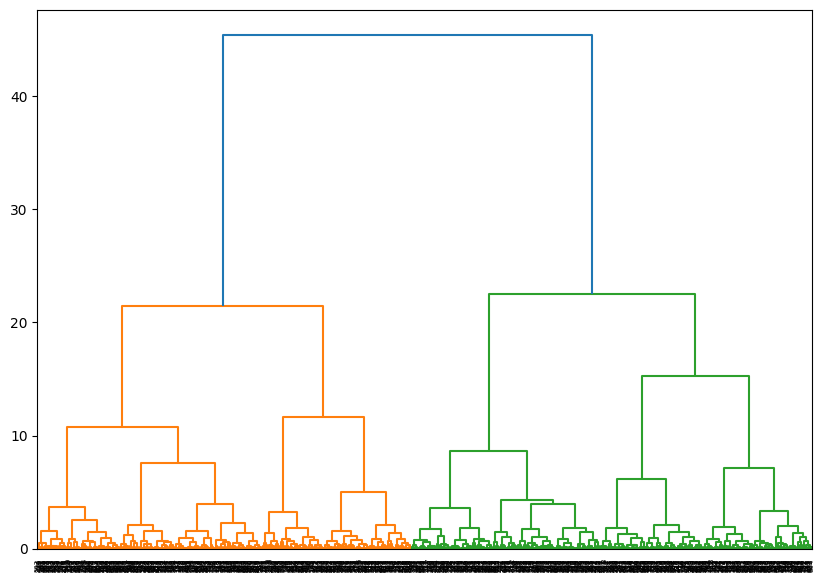

In [88]:
print_dendogram(MC_df, 'ward')

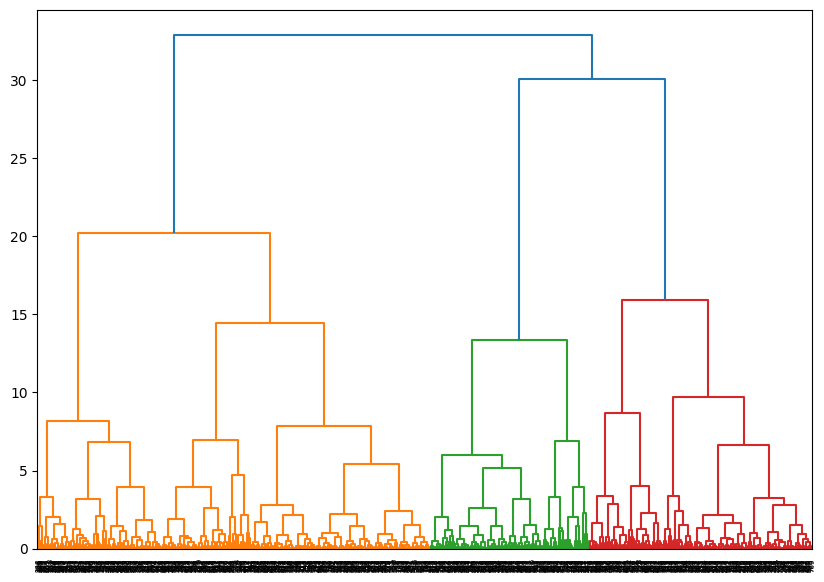

In [89]:
print_dendogram(NC_df, 'ward')

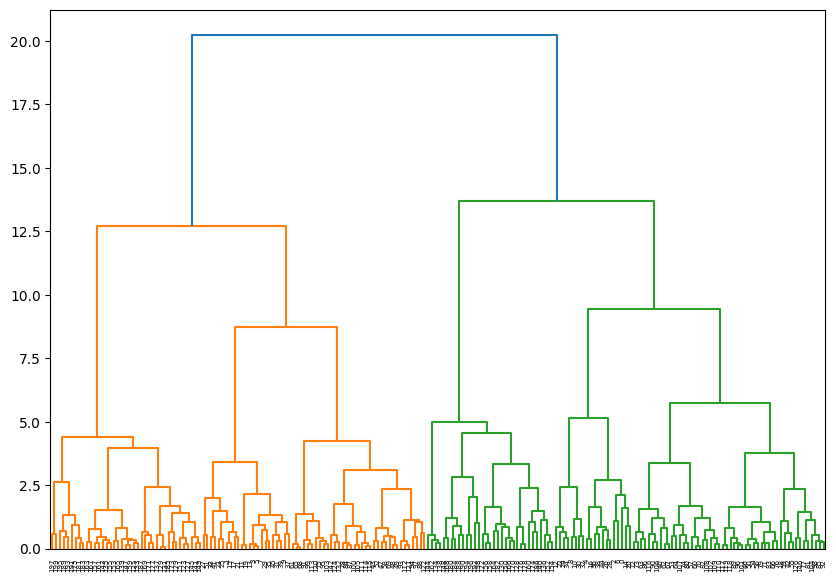

In [90]:
print_dendogram(HS_df_modified, 'ward')

In [91]:
def get_clusters(data, n_clusters, method):
    Z = linkage(data, method)
    clusters = fcluster(Z, n_clusters, criterion='maxclust')
    return clusters

In [92]:
def run_hierarchical_clustering(data, n_clusters, method):
    # Perform agglomerative clustering
    model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage=method)
    labels = model.fit_predict(data)    
    return labels

In [93]:
def plot_clusters(data, labels):
    plt.figure(figsize=(10, 7))
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=100, cmap='viridis')
    plt.title('Agglomerative Clustering Results')
    plt.colorbar(label='Cluster Label')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

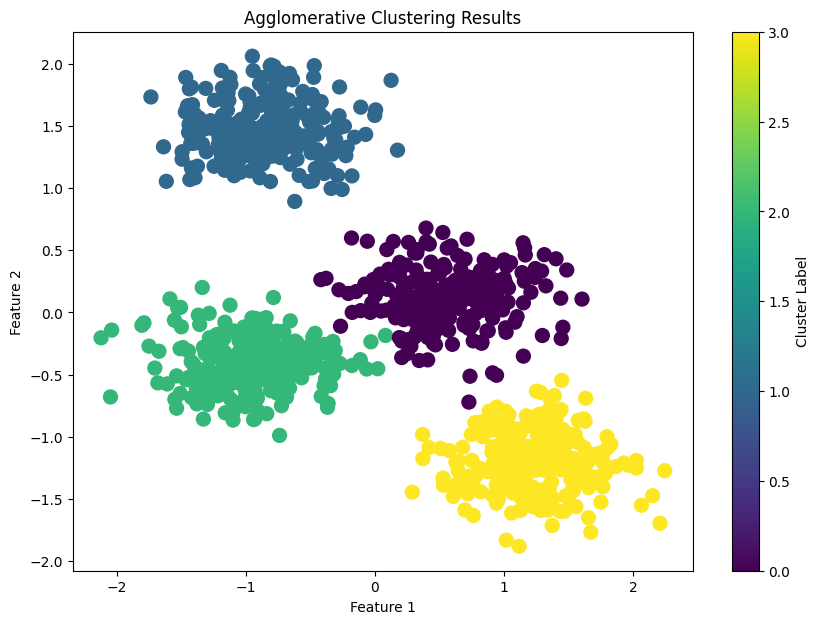

In [94]:
run_hierarchical_clustering(SC_df, 4, 'ward')
plot_clusters(SC_df.values, run_hierarchical_clustering(SC_df, 4, 'ward'))

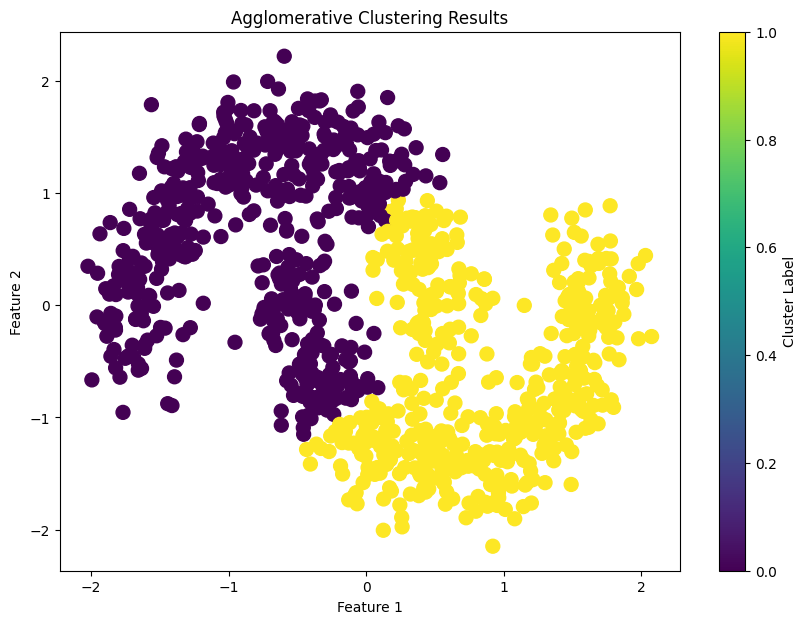

In [95]:
run_hierarchical_clustering(MC_df, 2, 'ward')
plot_clusters(MC_df.values, run_hierarchical_clustering(MC_df, 2, 'ward'))

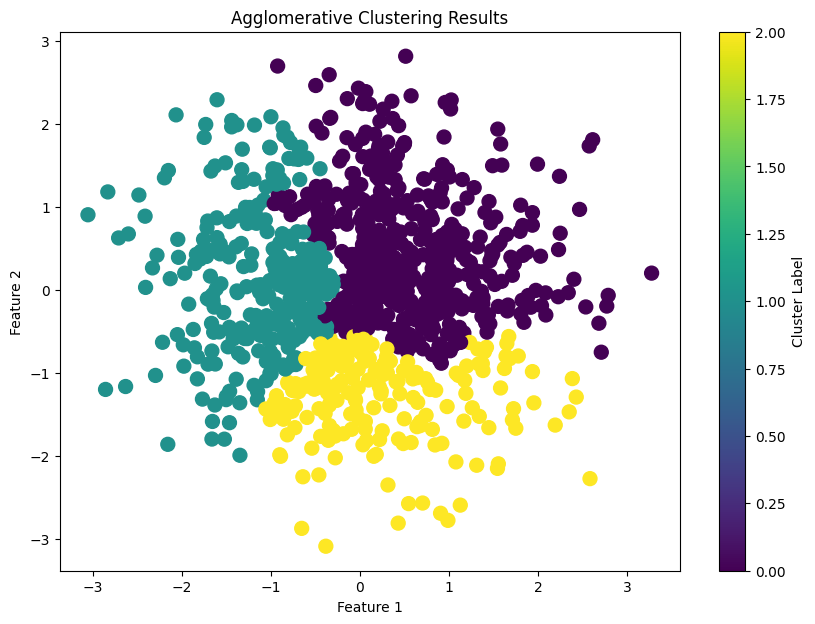

In [96]:
run_hierarchical_clustering(NC_df, 3, 'ward')
plot_clusters(NC_df.values, run_hierarchical_clustering(NC_df, 3, 'ward'))

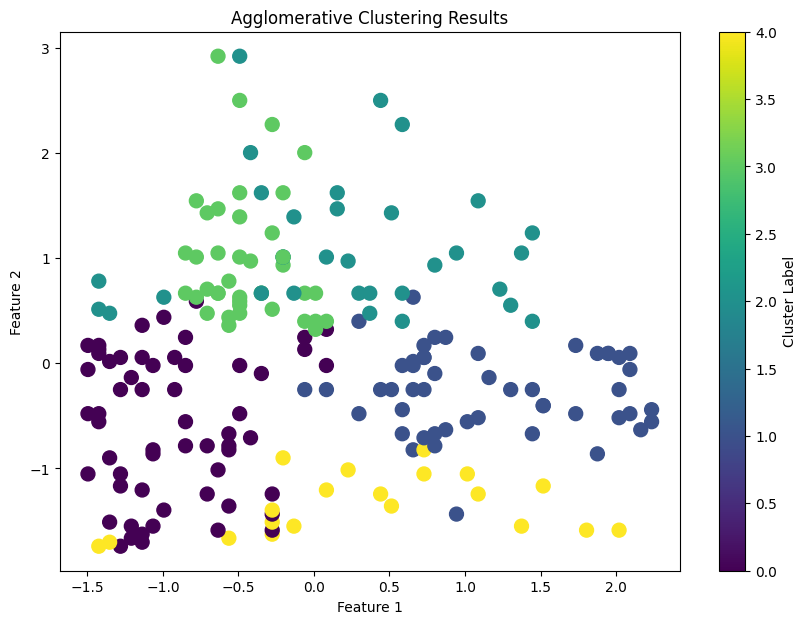

In [97]:
run_hierarchical_clustering(HS_df_modified, 5, 'ward')
plot_clusters(HS_df_modified.values, run_hierarchical_clustering(HS_df_modified, 5, 'ward'))

In [98]:
def plot_3d_clusters(data, labels):
    fig = px.scatter_3d(x=data[:, 0], y=data[:, 1], z=data[:, 2], color=labels)
    fig.show()

In [99]:
## Without Gender 
plot_3d_clusters(HS_df_modified.values, run_hierarchical_clustering(HS_df_modified, 5, 'ward'))

In [100]:
# def plot_3d_clusters(data, labels):
#     fig = px.scatter_3d(x=data[:, ], y=data[:, 2], z=data[:, 3], color=labels)
#     fig.show()

# ## Without Age
# plot_3d_clusters(HS_df_modified.values, run_hierarchical_clustering(HS_df_modified, 5, 'ward'))